In [ ]:
# Step 1: Pull image data From Sentinel API

import sys
!{sys.executable} -m pip install sentinelsat

In [ ]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

In [ ]:
api = SentinelAPI('theoreticalmarsupial', 'Splootking2022')
api 

In [ ]:
my_geojson = {
  "type": "Feature", #let's define our GeoJSON type. As it's a single geometry, it's just a single 'Feature'
  "geometry": {
	"type": "Polygon", #let's define our geometry type, which as we have a square, is a polygon.
	"coordinates": [ #Here are our actual geometry coordinates
	  [
		[
		  -77.247799,
		  38.672328
		],
		[
		  -77.245128,
		  38.673103
		],
		[
		  -77.243468,
		  38.672082
		],
		[
		  -77.246806,
		  38.671328
		],
		[
		  -77.247799,
		  38.672328
		]
	  ],
	]
  },
    "properties": {'id': 'WT'}, #And an example geometry ID, although not strictly necessary for this task
}
my_geojson

In [ ]:
footprint = geojson_to_wkt(my_geojson)
footprint

In [ ]:
# Specify the products and associated characteristics
products = api.query(
    footprint,
    platformname = 'Sentinel-2',
    date = ('20210701', '20220704'),
    cloudcoverpercentage = (0,10),
    limit=1
)

# Now download them!!
api.download_all(products)

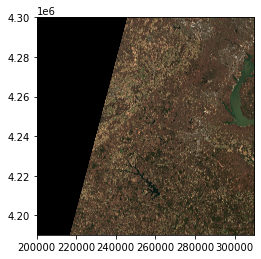

<AxesSubplot:>

In [14]:
# Step 2: Display image

from rasterio.plot import show
show(my_image)

In [16]:
print(my_image.crs)

EPSG:32618


In [9]:
# Define area of i95 bridge crossing

xmin = 304304.0
ymin = 4282662.0
xmax = 304966.0
ymax = 4282904.0

In [10]:
# Clip

my_geojson = [
    {
        "type": "Polygon", #let's define our geometry type, which as we have a square, is a polygon.
        "coordinates": [   #Here are our actual geometry coordinates
          [
            [
              xmin,
              ymin
            ],
            [
              xmax,
              ymin
            ],
            [
              xmax,
              ymax
            ],
            [
              xmin,
              ymax
            ],
            [
              xmin,
              ymin
            ]
          ],
        ]
      }
    ]
my_geojson

[{'type': 'Polygon',
  'coordinates': [[[304304.0, 4282662.0],
    [304966.0, 4282662.0],
    [304966.0, 4282904.0],
    [304304.0, 4282904.0],
    [304304.0, 4282662.0]]]}]

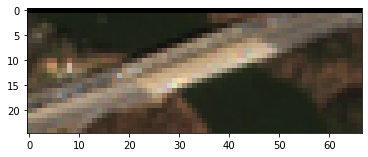

<AxesSubplot:>

In [11]:
from rasterio.mask import mask

# Now we can apply the rasterio mask 
# We specify the function needs to crop (via crop=True)
with rasterio.open(image_file) as img:
    clipped, transform = mask(img, my_geojson, crop=True)

# Let's look at our clipped image
show(clipped)


In [12]:
# Step 3: Write image to file

meta = my_image.meta.copy()

meta.update(
    {
    
        "transform": transform,
        "height":clipped.shape[1],
        "width":clipped.shape[2]
    }
)


with rasterio.open('clipped.tif', 'w', **meta) as dst:
    dst.write(clipped)
    
print('Writing complete')

Writing complete
